## PCA 차원축소

In [ ]:
# 참고 유용
# https://excelsior-cjh.tistory.com/167

In [77]:
import pandas as pd
import numpy as np
import scipy as sp
import mglearn as mgno

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

%matplotlib inline
sns.set()

In [153]:
train = pd.read_csv('C:/Users/KIHyuk/Desktop/dacon_data/Data_천체유형분류/train.csv',index_col=0)
test = pd.read_csv('C:/Users/KIHyuk/Desktop/dacon_data/Data_천체유형분류/test.csv',index_col=0)
sample_submission = pd.read_csv('C:/Users/KIHyuk/Desktop/dacon_data/Data_천체유형분류/sample_submission.csv',index_col=0)

In [144]:
train.head()

,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,,,,,,,,,,,,,,,,,,,,,
0,QSO,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,...,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,QSO,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,...,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,QSO,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,...,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928
3,QSO,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,...,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855
4,STAR_RED_DWARF,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,...,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655


In [154]:
column_number = {}
for i, column in enumerate(sample_submission.columns):
    column_number[column] = i
    
def to_number(x, dic):
    return dic[x]

train['type_num'] = train['type'].apply(lambda x: to_number(x, column_number))

train_x = train.drop(columns=['type', 'type_num'], axis=1)
train_y = train['type_num']
test_x = test

# train_x = train_x.drop(['fiberID'],axis=1) 
# test_x = test_x.drop(['fiberID'],axis=1)

In [155]:
len(train_x.columns) # 차원수

21

In [156]:
# PCA는 스케일 조정 필수
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.fit_transform(test_x)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [157]:
pca = PCA(n_components=0.95) 
# n_components => 2,3,4,5~ 줄일 차원수 지정
# 0~1사이 지정 => ex) 0.95 , 분산읜 95%만 유지하도록 차원을 축소

train_x_pca = pca.fit_transform(train_x)

In [151]:
# print('singular value :', pca.singular_values_)
# print('singular vector :\n', pca.components_.T)

In [158]:
# print('eigen_value :', pca.explained_variance_)
print('explained variance ratio :', pca.explained_variance_ratio_) # 주성분별 분산 설명 비율 (*설명비율)
print('선택한 차원(픽셀) 수 :', pca.n_components_) # 95%의 분산 설명을 위해 몇개의 차원을 선택했는가

explained variance ratio : [0.37156574 0.13270829 0.06499101 0.06233279 0.05396813 0.04761794
 0.04631057 0.03995411 0.03555699 0.03273236 0.02603151 0.02267698
 0.01714533]
선택한 차원(픽셀) 수 : 13


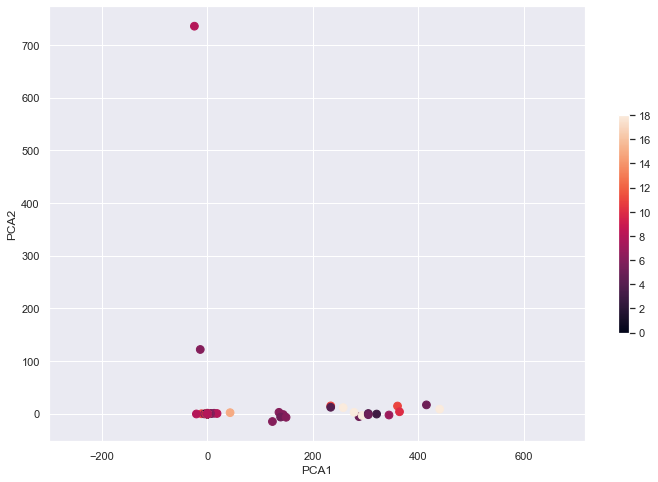

In [152]:
plt.figure(figsize=[12,8])
plt.scatter(train_x_pca[:,0], train_x_pca[:,1], c=train_y, s=60)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.axis('equal')
plt.colorbar(shrink=0.5)